In [40]:
import tensorflow as tf
import numpy as np
import keras
from keras import layers
from preprocessing.patch_generator import smash_n_reconstruct
import preprocessing.filters as f
from PIL import Image
from matplotlib import pyplot as plt

In [41]:
classifier = keras.models.load_model('./classifier.h5')

In [42]:
def hard_tanh(x):
    return tf.clip_by_value(x,-1,1)

model = keras.Sequential([
        layers.Input(shape=(256,256,1)),
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.Lambda(hard_tanh)
    ])

model.compile(optimizer='adam',loss=keras.losses.BinaryCrossentropy,metrics=['accuracy'])
model.build()

In [43]:
def preprocess(path:str):
    rt,pt = smash_n_reconstruct(input_path=path)
    frt = tf.constant([f.apply_all_filters(rt)])
    fpt = tf.constant([f.apply_all_filters(pt)])
    return model.predict(frt)-model.predict(fpt)

In [44]:
path1 = './test_imgs/tests/img1(fake).jpg'
path2 = './test_imgs/tests/img1(real).jpg'

# first image

1/1 [==============================] - 0s 15ms/step


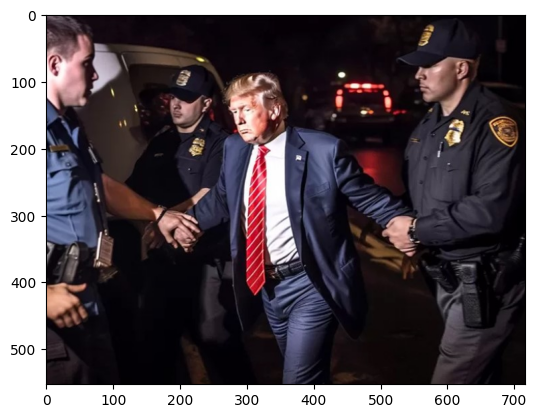

In [45]:
input = preprocess(path1)
plt.imshow(Image.open(path1))
plt.show()

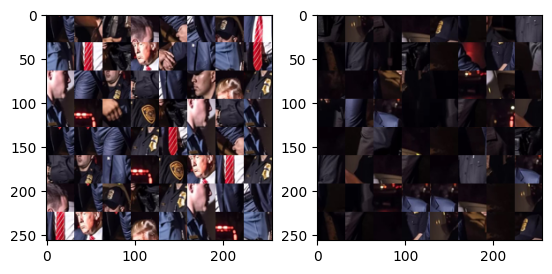

In [46]:
rt,pt = smash_n_reconstruct(path1)
plt.subplot(1,2,1)
plt.imshow(rt)
plt.subplot(1,2,2)
plt.imshow(pt)
plt.show()

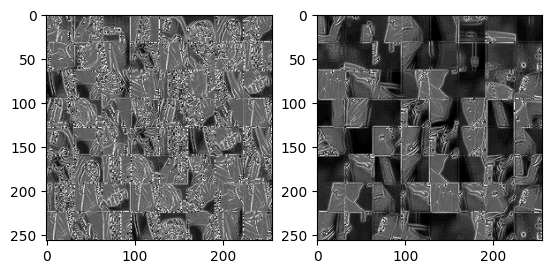

In [47]:
rt,pt = smash_n_reconstruct(path1)
plt.subplot(1,2,1)
plt.imshow(f.apply_all_filters(rt),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(f.apply_all_filters(pt),cmap='gray')

# Prediction

In [48]:
classifier.predict(input)

1/1 [==============================] - 0s 270ms/step


array([[0.9995007]], dtype=float32)

# second image

1/1 [==============================] - 0s 31ms/step


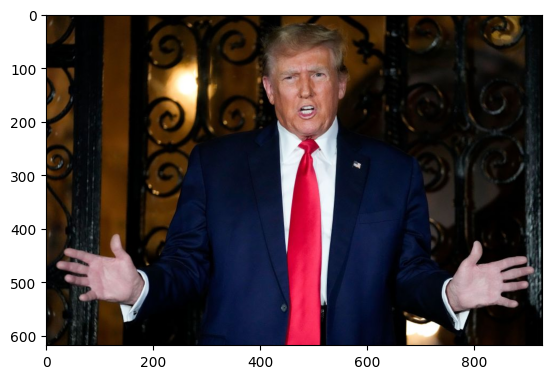

In [49]:
input = preprocess(path2)
plt.imshow(Image.open(path2))
plt.show()

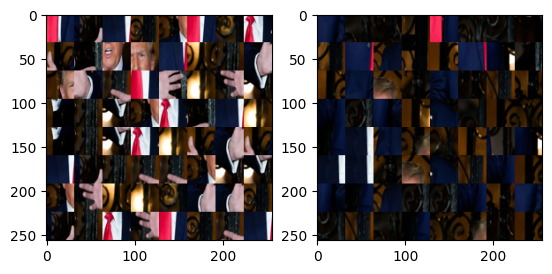

In [50]:
rt,pt = smash_n_reconstruct(path2)
plt.subplot(1,2,1)
plt.imshow(rt)
plt.subplot(1,2,2)
plt.imshow(pt)
plt.show()

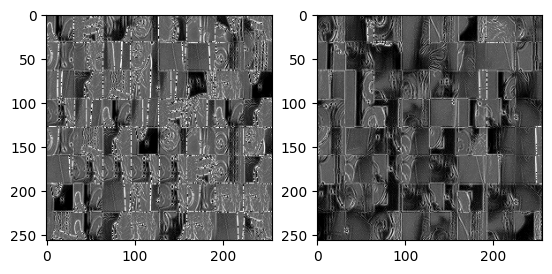

In [51]:
rt,pt = smash_n_reconstruct(path2)
plt.subplot(1,2,1)
plt.imshow(f.apply_all_filters(rt),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(f.apply_all_filters(pt),cmap='gray')

# Prediction

In [52]:
input = preprocess(path2)

1/1 [==============================] - 0s 33ms/step


In [53]:
classifier.predict(input)

1/1 [==============================] - 0s 120ms/step


array([[0.00252473]], dtype=float32)